**TD 5 Market Risk**

In [10]:
#Haar father wavelet

def Haar_father(t):
  x=0
  if t>= 0 and t<=1:
    x=1
  return x

#Haar son wavelet
def Haar_son(t,j,k):
  return (2**j/2)*Haar_father((2**j)*t-k)


Question 2

In [11]:
def coeff(j,k,r):
  n=len(r)
  somme=0
  for i in range(n):
    somme+= r[i]*Haar_son(i,j,k)

  return somme

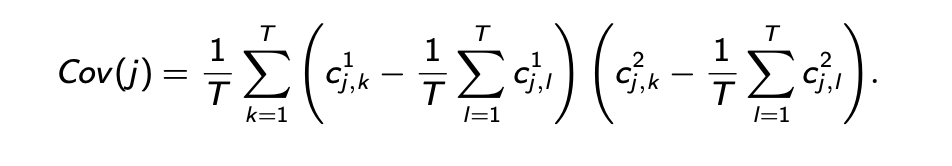

In [12]:
def Covarriance(j,rend1,rend2):
    #T=longueur des données, j=dilatation
    T=len(rend1)
    sommec1=0
    sommec2=0
    somme=0
    for i in range(T):
        sommec1 += coeff(j, i, rend1)
        sommec2 += coeff(j, i, rend2)
    for k in range(T):
        somme += (coeff(j,k,rend1)-sommec1/T) * (coeff(j,k,rend2)-sommec2/T)
    return somme/T

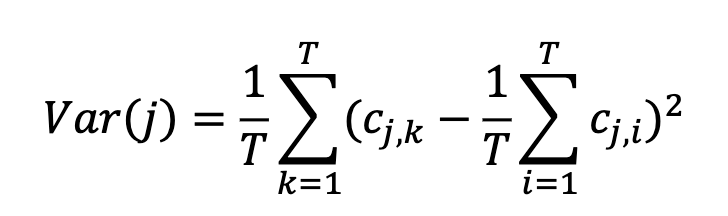

In [13]:
def var(j, rend):
    T = len(rend)  # Number of observations for asset j
    somme_c1 = sum(coeff(j, i, rend) for i in range(T))


    somme = sum((coeff(j, k, rend) - somme_c1 / T) ** 2 for k in range(T))

    return somme / T


In [14]:
def correlation(j,returns1,returns2):
  a=Covarriance(j,returns1,returns2)
  b=var(j,returns1)**(1/2)
  c=var(j,returns2)**(1/2)
  d= b*c

  return a/d

# Implementation des données

In [109]:
import pandas as pd

df=pd.read_excel('/content/Dataset TD5.xlsx', engine='openpyxl',header=1)


df_gbpeur = df.iloc[:, :4]
df_sekeur = df.iloc[:, 4:8]
df_cadeur = df.iloc[:, 8:]

In [110]:
noms_colonnes_gbpeur = ['Date', 'High', 'Low', 'NaN_GBPEUR']
df_gbpeur.columns = noms_colonnes_gbpeur
df_gbpeur = df_gbpeur.drop(0, axis=0)
df_gbpeur = df_gbpeur.drop(df_gbpeur.columns[-1], axis=1)
df_gbpeur['Mid'] = (df_gbpeur['High']+df_gbpeur['Low'])/2
df_gbpeur['Price Returns']=df_gbpeur['Mid'].pct_change().dropna()
df_gbpeur = df_gbpeur.drop(1, axis=0)


In [111]:
noms_colonnes_sekeur = ['Date', 'High', 'Low', 'NaN_GBPEUR']
df_sekeur.columns = noms_colonnes_sekeur
df_sekeur = df_sekeur.drop(0, axis=0)
df_sekeur = df_sekeur.drop(df_sekeur.columns[-1], axis=1)
df_sekeur['Mid'] = (df_sekeur['High']+df_sekeur['Low'])/2
df_sekeur['Price Returns']=df_sekeur['Mid'].pct_change().dropna()
df_sekeur = df_sekeur.drop(1, axis=0)

In [112]:
noms_colonnes_cadeur = ['Date', 'High', 'Low']
df_cadeur.columns = noms_colonnes_cadeur
df_cadeur = df_cadeur.drop(0, axis=0)
df_cadeur['Mid'] = (df_cadeur['High']+df_cadeur['Low'])/2
df_cadeur['Price Returns']=df_cadeur['Mid'].pct_change().dropna()
df_cadeur = df_cadeur.drop(1, axis=0)

# Matrice correlation


In [65]:
df_gbpeur_return= df_gbpeur['Price Returns'].iloc[-513:].to_list()
df_cadeur_return=df_cadeur['Price Returns'].iloc[-513:].to_list()
df_sekeur_return= df_sekeur['Price Returns'].iloc[-513:].to_list()
df_sekeur_return=df_sekeur_return[1:]


In [20]:
import numpy as np


def matrice_correl(act1,act2,act3,j):
  matrice = np.zeros((3, 3))

  matrice[0,0]=correlation(j,act1,act1)
  matrice[0,1]=correlation(j,act1,act2)
  matrice[0,2]=correlation(j,act1,act3)

  matrice[1,0]=correlation(j,act2,act1)
  matrice[1,1]=correlation(j,act2,act2)
  matrice[1,2]=correlation(j,act2,act3)

  matrice[2,0]=correlation(j,act3,act1)
  matrice[2,1]=correlation(j,act3,act2)
  matrice[2,2]=correlation(j,act3,act3)

  return matrice

mat_correl= matrice_correl(df_gbpeur_return,df_cadeur_return,df_sekeur_return,1)
print(mat_correl)

[[1.         0.25613324 0.1557968 ]
 [0.25613324 1.         0.08045969]
 [0.15621104 0.08026541 1.        ]]


In [80]:
l=[]

for j in range(1,9):
  l.append(matrice_correl(df_gbpeur_return,df_cadeur_return,df_sekeur_return,j))
  print(f"Matrice pour j={j} :\n{matrice_correl(df_gbpeur_return,df_cadeur_return,df_sekeur_return,j)}\n")


Matrice pour j=1 :
[[1.         0.25613324 0.1557968 ]
 [0.25613324 1.         0.08045969]
 [0.15621104 0.08026541 1.        ]]

Matrice pour j=2 :
[[1.         0.06070569 0.25069275]
 [0.06070569 1.         0.0423825 ]
 [0.25161533 0.04374859 1.        ]]

Matrice pour j=3 :
[[ 1.         -0.10529352  0.09043295]
 [-0.10529352  1.          0.11465756]
 [ 0.08895411  0.11473742  1.        ]]

Matrice pour j=4 :
[[ 1.         -0.12089604  0.08202706]
 [-0.12089604  1.          0.22909689]
 [ 0.07801145  0.23187115  1.        ]]

Matrice pour j=5 :
[[1.         0.04649639 0.60279922]
 [0.04649639 1.         0.44378674]
 [0.64744184 0.40713534 1.        ]]

Matrice pour j=6 :
[[1.         0.2294984  0.88613173]
 [0.2294984  1.         0.38250398]
 [0.67910502 0.38143765 1.        ]]

Matrice pour j=7 :
[[1.         0.15089826 0.72036092]
 [0.15089826 1.         0.75755157]
 [0.72157478 0.75946721 1.        ]]

Matrice pour j=8 :
[[ 1.         -0.12758141  0.6853179 ]
 [-0.12758141  1.    

In [110]:
l[5]

array([[ 1.        ,  0.24449367,  0.36966971],
       [ 0.24449367,  1.        , -0.24687451],
       [ 0.37090174, -0.2477032 ,  1.        ]])

# Exposant de Hurst

In [21]:
import math as m

def M2(rend):
  n=len(rend)
  M2=0
  for i in range(1,n):
    M2+= (abs(rend[i]-rend[i-1]))**2
  return M2/n

def M2p(rend):
  n=len(rend)
  M2=0
  for i in range(1,int(n/2)):
    M2+= (abs(rend[2*i]-rend[2*(i-1)]))**2
  return (M2)*(2/n)

def exponent_hurst(m2,m2_prime):
  return m.log2(m2_prime/m2)/2



In [73]:
M2_df_gbpeur_return=M2(df_gbpeur['Mid'].iloc[-513:].to_list())
M2p_df_gbpeur_return=M2p(df_gbpeur['Mid'].iloc[-513:].to_list())
H_gpbeur= exponent_hurst(M2_df_gbpeur_return,M2p_df_gbpeur_return)

print("The Hurst exponent for gpbeur is :",H_gpbeur)

The Hurst exponent for gpbeur is : 0.5915676243619193


In [75]:
M2_df_sekeur_return=M2(df_sekeur['Mid'].iloc[-513:].to_list())
M2p_df_sekeur_return=M2p(df_sekeur['Mid'].iloc[-513:].to_list())
H_sekeur=exponent_hurst(M2_df_sekeur_return,M2p_df_sekeur_return)
print("The Hurst exponent for sekeur is :",H_sekeur)

The Hurst exponent for sekeur is : 0.6513361851181492


In [76]:
M2_df_cadeur_return=M2(df_cadeur['Mid'].iloc[-513:].to_list())
M2p_df_cadeur_return=M2p(df_cadeur['Mid'].iloc[-513:].to_list())
H_cadeur=exponent_hurst(M2_df_cadeur_return,M2p_df_cadeur_return)
print("The Hurst exponent for cadeur is :",H_cadeur)

The Hurst exponent for cadeur is : 0.6482379777462784


# Vol annaulisé

In [77]:
volatility_gbpeur_15min = df_gbpeur['Price Returns'].iloc[-513:].std()

volatility_gbpeur_1an = volatility_gbpeur_15min *((4*24*252)**H_gpbeur)

print("The volatility 1year for gpbeur :",volatility_gbpeur_1an)

The volatility 1year for gpbeur : 0.18465243453265287


In [78]:
volatility_sekeur_15min=df_sekeur['Price Returns'].iloc[-513:].std()

volatility_sekeur_1an = volatility_sekeur_15min * (4*24*252)**H_sekeur

print("The volatility 1year for sekeur :",volatility_sekeur_1an)

The volatility 1year for sekeur : 0.1977779488411898


In [79]:
volatility_cadeur_15min=df_cadeur['Price Returns'].iloc[-513:].std()

volatility_cadeur_1an = volatility_cadeur_15min*(4*24*252)**H_cadeur

print("The volatility 1year for cadeur :",volatility_cadeur_1an)

The volatility 1year for cadeur : 0.24045044750659264


# Vol en fonction de j

In [82]:
vol_gbpeur_j=[]

for j in range(1,9):
  vol_gbpeur_j.append(volatility_gbpeur_1an*((j/256)**H_gpbeur))
print(vol_gbpeur_j)

[0.006945735528954698, 0.010466412381945074, 0.013303555628635954, 0.015771661286593686, 0.017997254900027657, 0.020046904863422792, 0.02196093783834841, 0.023766051886903707]


In [83]:
vol_sekeur_j=[]

for j in range(1,9):
  vol_sekeur_j.append(volatility_sekeur_1an*((j/256)**H_sekeur))
print(vol_sekeur_j)

[0.005340771981707938, 0.008388334986988374, 0.010923715343931184, 0.013174905068954343, 0.015235913304959188, 0.017157029718032738, 0.018969110659970933, 0.020692798254386094]


In [84]:
vol_cadeur_j=[]

for j in range(1,9):
  vol_cadeur_j.append(volatility_cadeur_1an*((j/256)**H_cadeur))
print(vol_cadeur_j)

[0.00660561084553448, 0.010352662599283401, 0.01346483704835444, 0.016225240239069707, 0.018750458278803287, 0.02110280459681931, 0.023320487729064886, 0.02542905443800992]


In [85]:
vol_tot= [vol_gbpeur_j] + [vol_sekeur_j] + [vol_cadeur_j]

diff_vol=[]

for j in range(0,8):
  diag=np.zeros((3, 3))
  diag[0][0]=vol_tot[0][j]
  diag[1][1]=vol_tot[1][j]
  diag[2][2]=vol_tot[2][j]

  produit = np.dot(diag, l[j], diag)

  # Création du vecteur W et de sa transposée
  W = np.array([[1/3], [1/3], [1/3]])
  W_t = W.T

  # Calcul du produit final
  resultat = np.dot(W_t, produit)
  resultat2= np.dot(resultat,W)

  diff_vol.append(np.sqrt(resultat2)*100)


  print(f"The volatility of the portfolio for j={j+1} is {np.sqrt(resultat2)*100}%")


The volatility of the portfolio for j=1 is [[5.28236195]]%
The volatility of the portfolio for j=2 is [[6.35864902]]%
The volatility of the portfolio for j=3 is [[6.69488801]]%
The volatility of the portfolio for j=4 is [[7.52862934]]%
The volatility of the portfolio for j=5 is [[10.05058769]]%
The volatility of the portfolio for j=6 is [[11.23250432]]%
The volatility of the portfolio for j=7 is [[12.25449178]]%
The volatility of the portfolio for j=8 is [[11.72027993]]%


# Question 2

In [139]:
df_sekeur['Date'] = pd.to_datetime(df_sekeur['Date'])
df_sekeur['DateOnly'] = df_sekeur['Date'].dt.date

df_gbpeur['Date'] = pd.to_datetime(df_gbpeur['Date'])
df_gbpeur['DateOnly'] = df_sekeur['Date'].dt.date

df_cadeur['Date'] = pd.to_datetime(df_cadeur['Date'])
df_cadeur['DateOnly'] = df_cadeur['Date'].dt.date


In [128]:

def q_return(df):
    quarterly_returns = []
    for date, group in df.groupby('DateOnly'):
        q = np.array_split(group, 4)
        for quarter in q:
            if len(quarter) > 1:
                s_price = quarter.iloc[0]['Mid']
                e_price = quarter.iloc[-1]['Mid']
                return_value = (e_price - start_price) / s_price
                quarterly_returns.append(return_value)
    return quarterly_returns

def q_vol(quarterly_returns):
    quart = np.array_split(quarterly_returns, len(quarterly_returns) // 4)
    quart_vol = [np.std(q) for q in quart]
    return quart_vol

gbpeur_returns_nonoverlap=q_return(df_gbpeur)
cadeur_returns_nonoverlap=q_return(df_cadeur)
sekeur_returns_nonoverlap=q_return(df_sekeur)

gbpeur_quarterly_volatility = q_vol(gbpeur_returns_nonoverlap)
cadeur_quarterly_volatility = q_vol(cadeur_returns_nonoverlap)
sekeur_quarterly_volatility = q_vol(sekeur_returns_nonoverlap)


In [136]:
gpbeur_vol_lap_annualized= np.mean(gbpeur_quarterly_volatility) * np.sqrt(252 /4*96)
cadeur_vol_lap_annualized = np.mean(cadeur_quarterly_volatility) * np.sqrt(252 /4*96)
sekeur_vol_lap_annualized =np.mean(sekeur_quarterly_volatility) * np.sqrt(252 /4*96)


In [138]:
weight = 1/3

# Volatility of portfolio
portfolio_volatility = np.sqrt(
    (weight * gpbeur_vol_lap_annualized) ** 2 +
    (weight * cadeur_vol_lap_annualized) ** 2 +
    (weight * sekeur_vol_lap_annualized) ** 2
)

print("The portfolio volatility is ",portfolio_volatility*100,"%")


The portfolio volatility is  8.69178764052073 %
